In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as pl


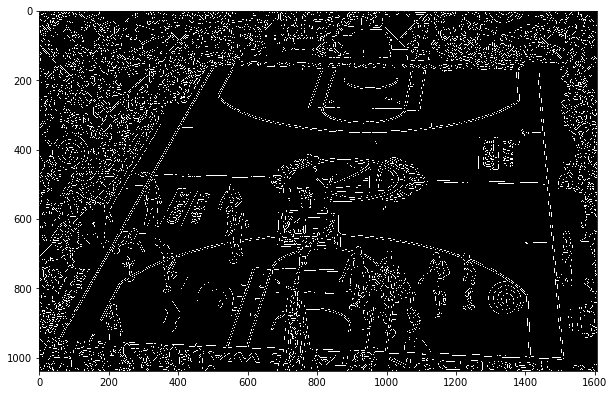

In [9]:
from skimage import feature, color

InputImage = plt.imread('images/test1.png')
f, ax = plt.subplots(figsize=(10, 10))
edges = feature.canny(color.rgb2gray(InputImage), sigma=2)
ax.imshow(edges, cmap='gray');

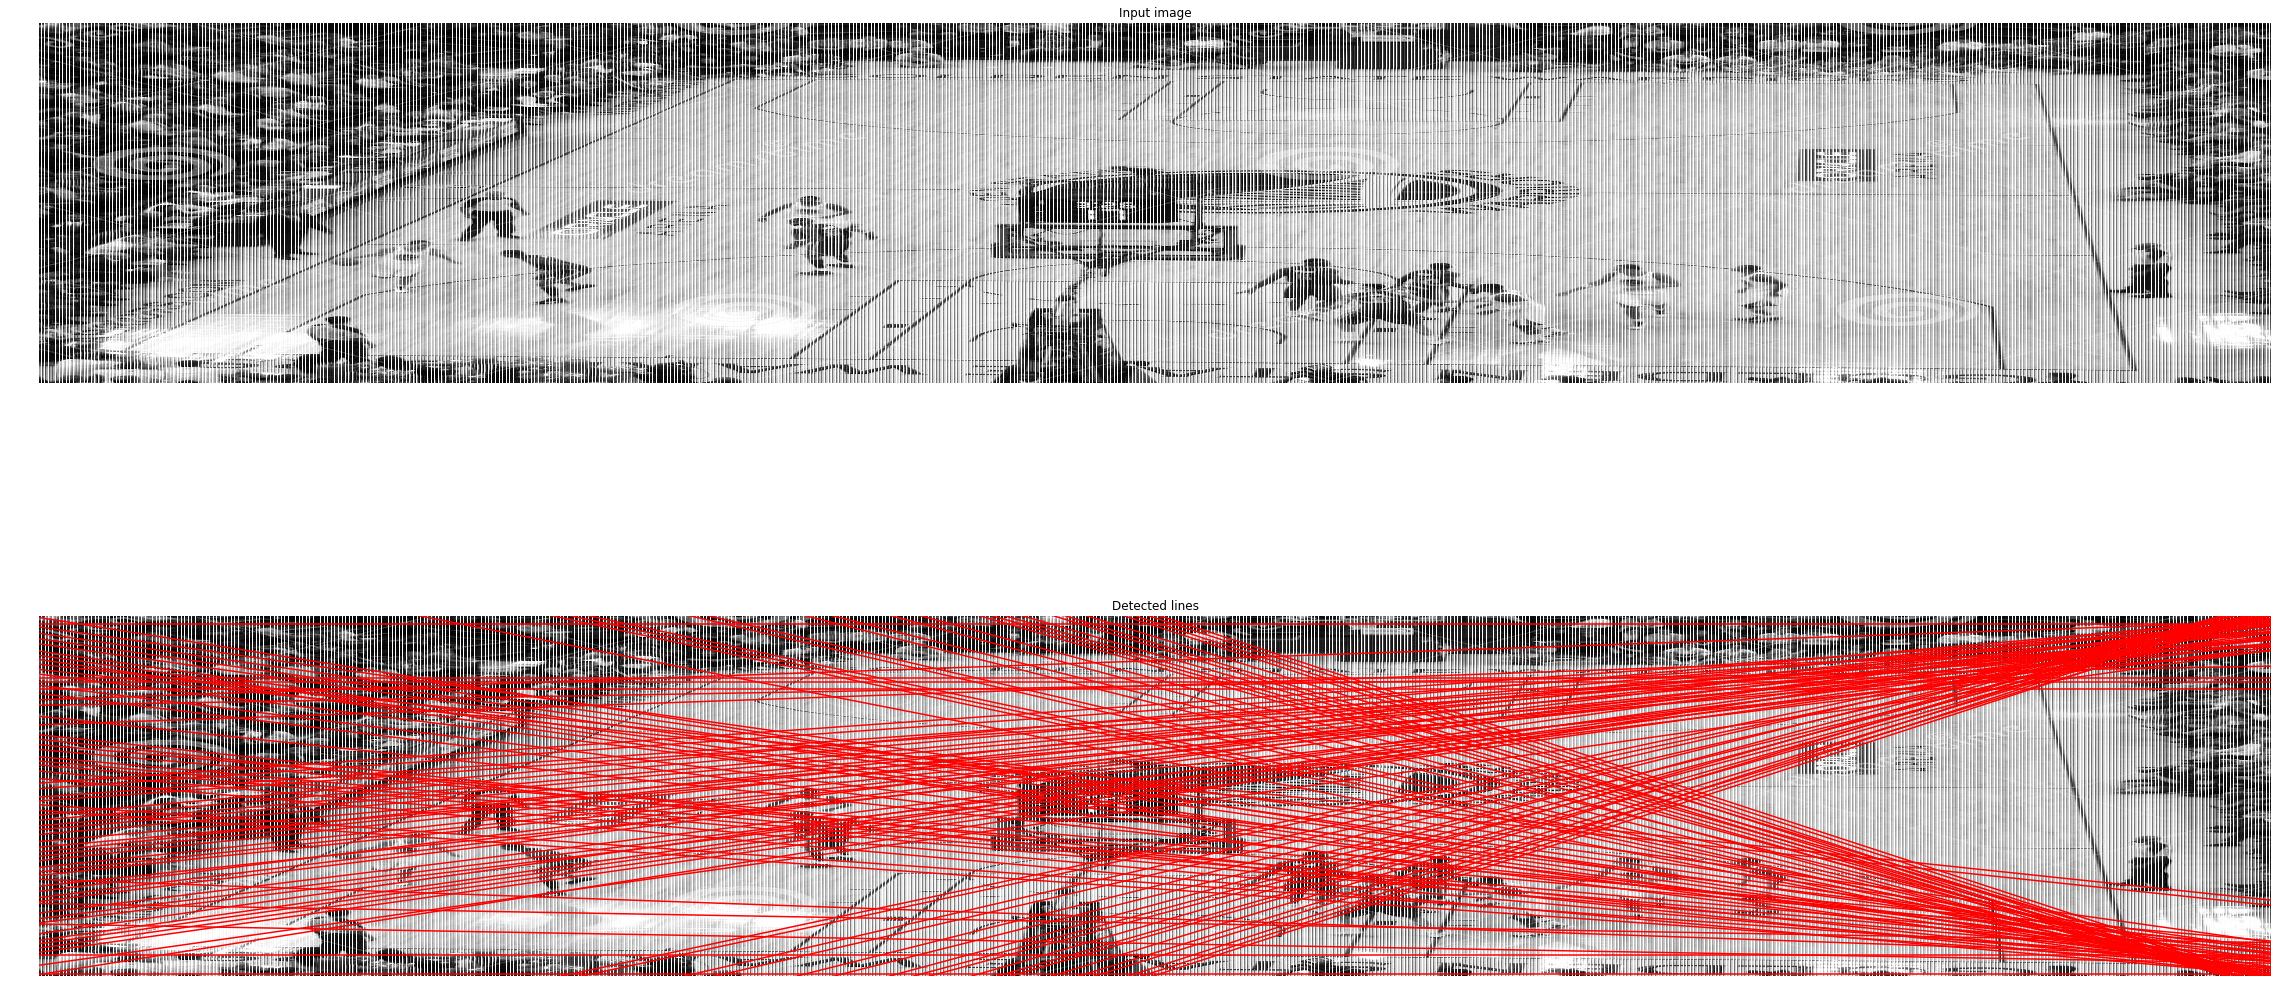

In [8]:
from skimage.transform import (hough_line, hough_line_peaks,probabilistic_hough_line)
from skimage.feature import canny
from skimage import data
from matplotlib import cm
from PIL import Image
from numpy import*

InputImage = plt.imread('images/test1.png')

image=asarray(InputImage)
x=image.shape[0]
y=image.shape[1]*image.shape[2] 
image.resize((x,y)) # a 2D array

h, theta, d = hough_line(image)

fig, axes = plt.subplots(2, 1, figsize=(40, 20))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[1].plot((0, image.shape[1]), (y0, y1), '-r')
ax[1].set_xlim((0, image.shape[1]))
ax[1].set_ylim((image.shape[0], 0))
ax[1].set_axis_off()
ax[1].set_title('Detected lines')

plt.show()



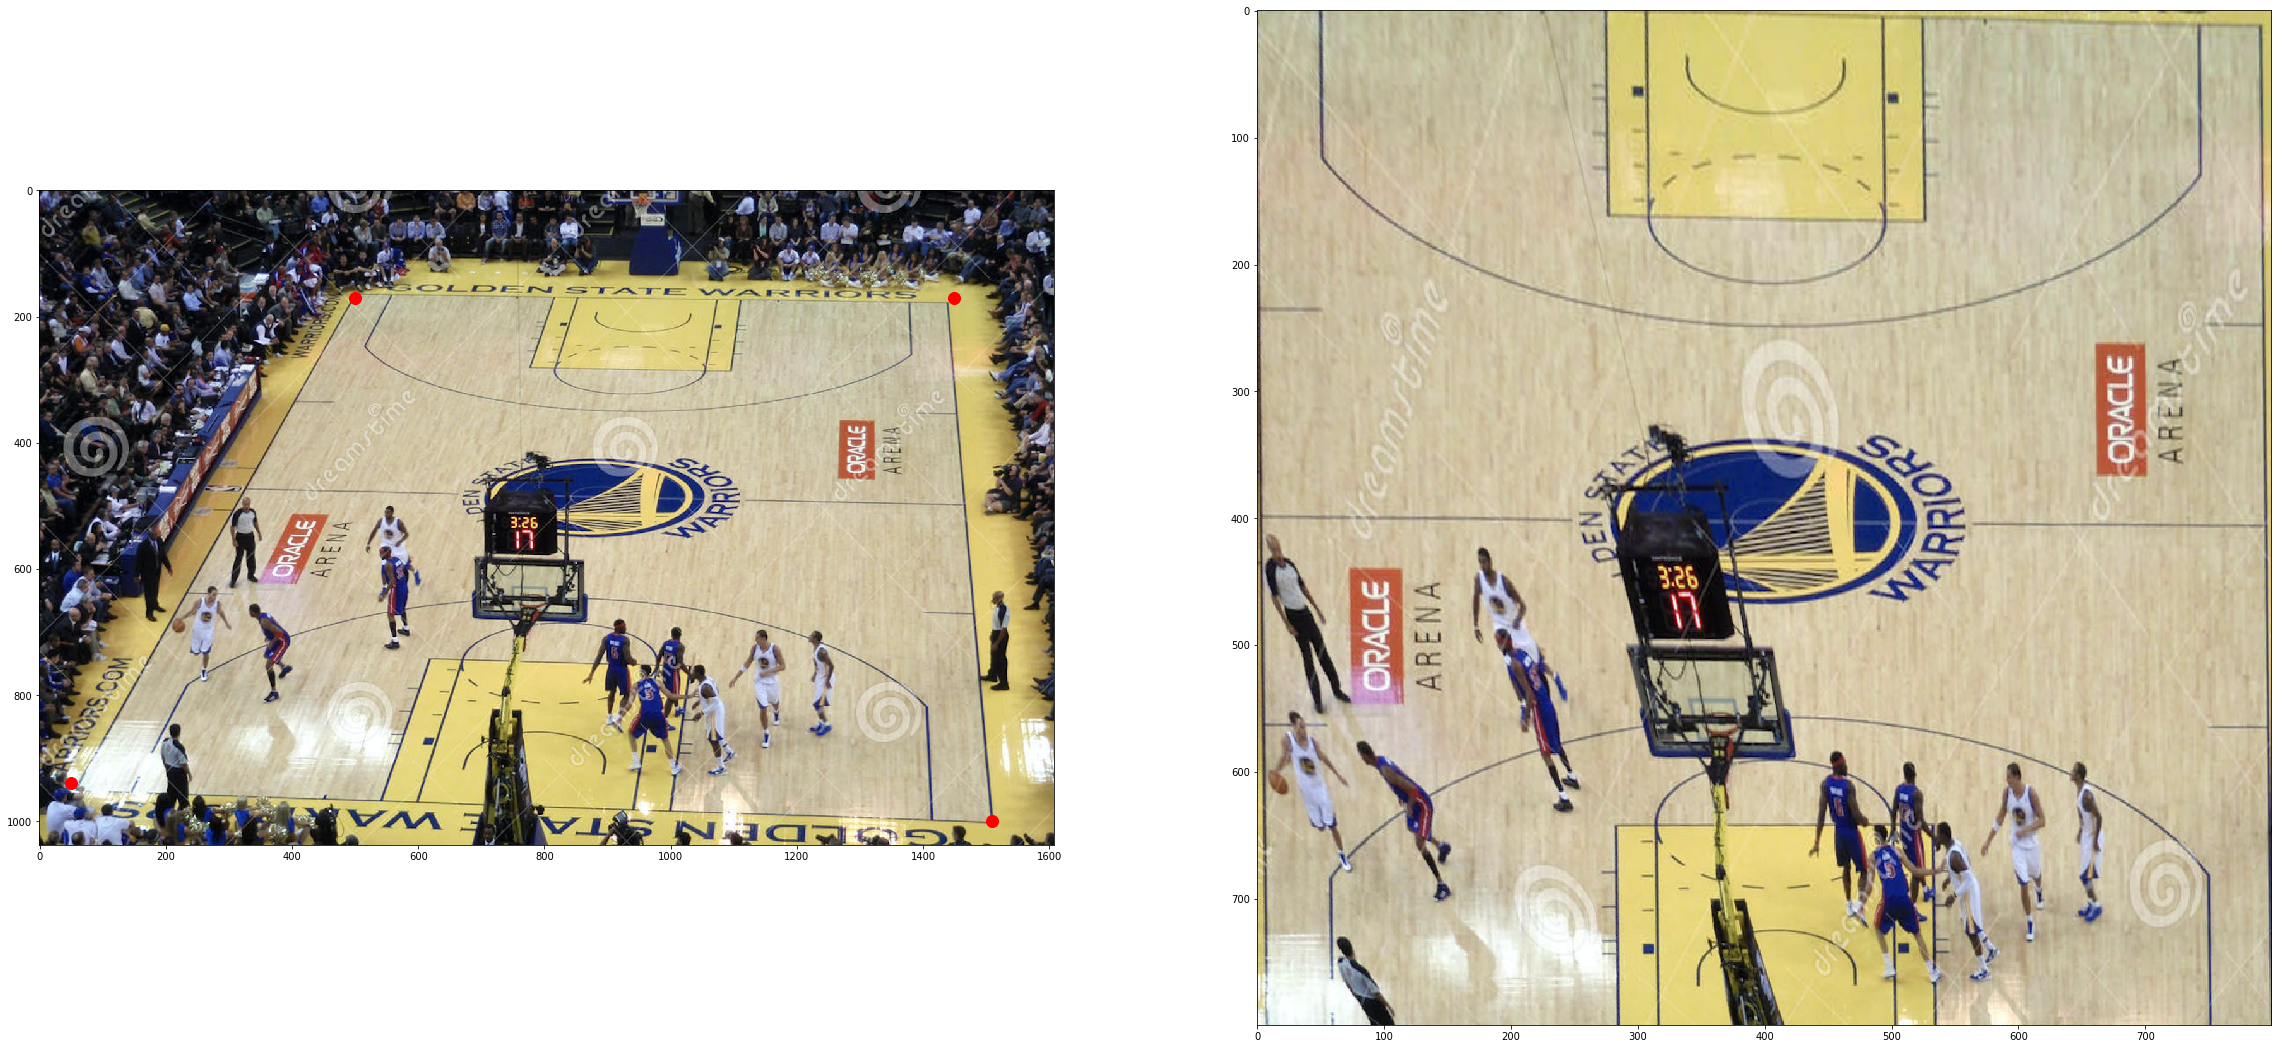

In [11]:
from __future__ import print_function
from skimage import transform
from skimage.transform import estimate_transform

quadrangleMatrix = np.array([(500, 170),
                   (1450, 170),
                   (50, 940),
                   (1510, 1000)])

outputWindow = np.array([[0, 0],
                   [800, 0],
                   [0, 800],
                   [800, 800]])

quadrangle = estimate_transform('projective', quadrangleMatrix, outputWindow)
qMatrix = quadrangle.params   


def rectification(xy):
    x = xy[:, 0]
    y = xy[:, 1]

    #find homogeneous coordinates and set p1
    p1 = np.linalg.inv(qMatrix)
    homogeneous_coordinates = np.column_stack([x, y, np.ones_like(x)])
    
    # calculate p2 
    p2 = np.dot(p1, homogeneous_coordinates.T)

    #Change format
    p2 = p2.T
    z = p2[:, 2]
    z = z.reshape([len(z), 1])
    p2 = p2 / z

    return p2[:, :2]


image = plt.imread('images/test1.png')
out = transform.warp(image, rectification, output_shape=(800, 800))

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(40, 20))
ax0.imshow(image)

#plot dots on quadrangle corners
ax0.plot(500, 170, color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax0.plot(1450, 170, color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax0.plot(50, 940, color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax0.plot(1510, 1000, color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)

ax1.imshow(out)

plt.show()
